In [14]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('Data/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [3]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [4]:
#Show top 5 rows
beer_df.head()

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0


In [5]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [6]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [7]:
#In order to remove seasonal patterns let us calculate 2X4 quarter moving average
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

Text(0.5,1,'Quaterly Beer Production between in Australia and 2X4 quarter MA')

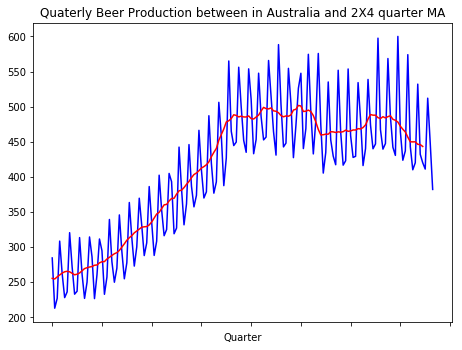

In [8]:
#Let's plot the original time series and the seasonal moving averages
fig = plt.figure(figsize=(7.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')
#plt.savefig('plots/ch2/B07887_02_16.png', format='png', dpi=300)

In [9]:
#Let's compute the residuals after removing the trend
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

Text(0.5,1,'Residuals in Quaterly Beer Production time series')

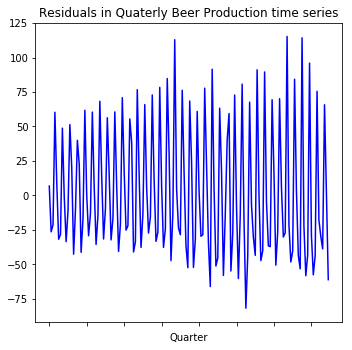

In [10]:
#Let's plot the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')
#plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)

In [11]:
from pandas.plotting import autocorrelation_plot

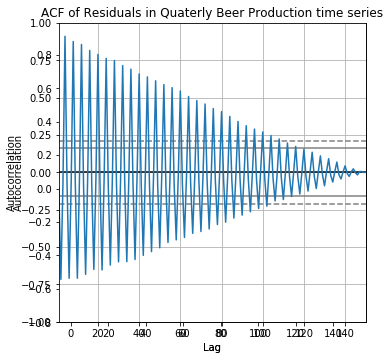

In [15]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
#plt.savefig('plots/ch2/B07887_02_18.png', format='png', dpi=300)
autocorrelation_plot(residuals)

In [16]:
#Let's compute quarterly differecing to remove quaterly seasonality
residuals_qtr_diff = residuals.diff(4)

In [17]:
#Remove null values
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

Text(0.5,1,'ACF of Quaterly Differenced Residuals')

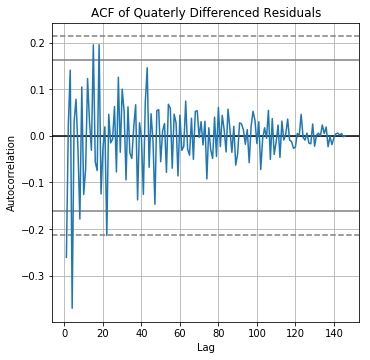

In [18]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')
#plt.savefig('plots/ch2/B07887_02_19.png', format='png', dpi=300)